In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [20]:
class LDA:
    def __init__(self,n_components):
        self.n_components = n_components
        self.eigenvecs = None
    
    def fit(self,X,y):
        n_features = X.shape[1]
        class_labels = np.unique(y)
        
        #Scatter between classes , Scatter within classes
        mean_overall = np.mean(X,axis = 0)
        S_W = np.zeros((n_features,n_features))
        S_B = np.zeros((n_features,n_features))
        
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c,axis = 0)
            S_W += (X_c - mean_c).T.dot((X_c - mean_c))
            
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features,1)
            S_B += n_c* mean_diff.dot(mean_diff.T)
        
        A = np.linalg.inv(S_W).dot(S_B)
        eigenvalues,eigenvectors = np.linalg.eig(A)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.eigenvecs = eigenvectors[:self.n_components]
        
    
    def transform(self,X):
        return np.dot(X,self.eigenvecs.T)

In [21]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [22]:
lda = LDA(2)
lda.fit(X,y)
X_transformed = lda.transform(X)

In [23]:
print(np.shape(X))
print(np.shape(X_transformed))

(150, 4)
(150, 2)


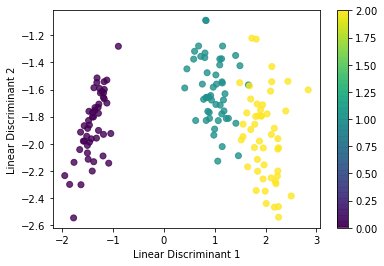

In [24]:
plt.scatter(X_transformed[:,0],X_transformed[:,1],c = y, alpha = 0.8)
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar()
plt.show()

In [26]:
X_transformed_sklearn = LinearDiscriminantAnalysis().fit_transform(X,y)

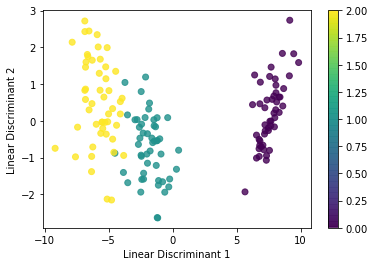

In [27]:
plt.scatter(X_transformed_sklearn[:,0],X_transformed_sklearn[:,1],c = y, alpha = 0.8)
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar()
plt.show()